In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_json(path_to_file):
    with open(path_to_file) as f:
        data = json.load(f)
    return data


f_train = load_json("arc-agi_training_challenges.json")
f_train_solution = load_json("arc-agi_training_solutions.json")

f_eval = load_json("arc-agi_evaluation_challenges.json")
f_eval_solution = load_json("arc-agi_evaluation_solutions.json")

f_submission = load_json("arc-agi_test_challenges.json")
f_sample_submission = load_json("sample_submission.json")

In [3]:
# check files okay, get number of examples in each
n_train = len(f_train)
n_submission = len(f_submission)
n_eval = len(f_eval)
print("train %d, eval %d, submission %d " % (n_train, n_eval, n_submission))
train_ids = list(f_train)

train 400, eval 400, submission 100 


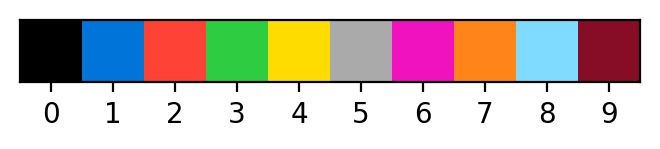

In [4]:
# notebook source: https://www.kaggle.com/code/allegich/arc-2024-starter-notebook-eda

from matplotlib import colors

# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
CMAP = colors.ListedColormap(
    [
        "#000000",
        "#0074D9",
        "#FF4136",
        "#2ECC40",
        "#FFDC00",
        "#AAAAAA",
        "#F012BE",
        "#FF851B",
        "#7FDBFF",
        "#870C25",
    ]
)
NORM = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=CMAP, norm=NORM)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

n samples 5
train id 007bbfb7, n_colors 1, shape in (3, 3) shape out (9, 9)


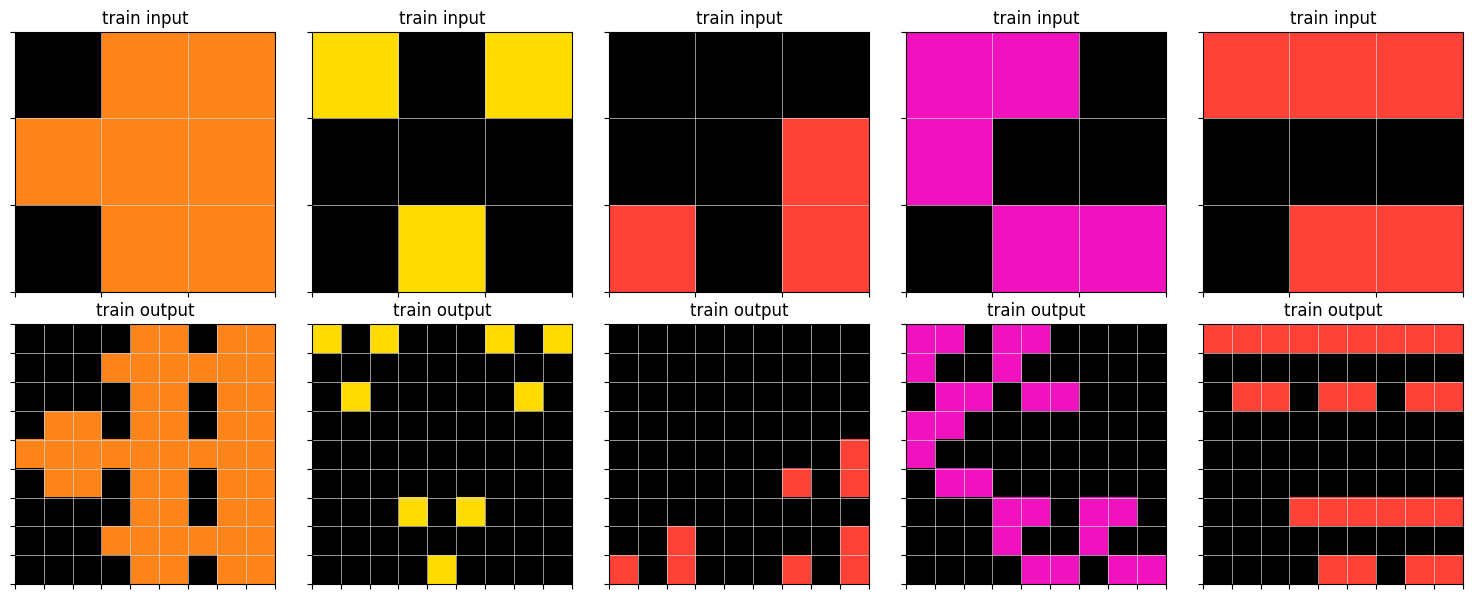

test img colors [0 7], shape (3, 3)


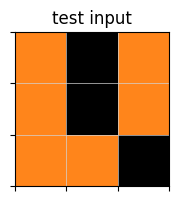

In [5]:
# adapted from: https://www.kaggle.com/code/allegich/arc-2024-starter-notebook-eda


def plot_one(task, ax, i, train_or_test, input_or_output):
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=CMAP, norm=NORM)
    ax.grid(True, which="both", color="lightgrey", linewidth=0.5)
    ax.set_yticks([x - 0.5 for x in range(1 + len(input_matrix))])
    ax.set_xticks([x - 0.5 for x in range(1 + len(input_matrix[0]))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + " " + input_or_output)


def plot_sample(sample):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    n_samples = len(sample["train"])
    print("n samples", n_samples)
    print(
        "train id %s, n_colors %s, shape in %s shape out %s"
        % (
            train_ids[0],
            len(np.unique(sample["train"][0]["input"])) - 1,
            np.array(sample["train"][0]["input"]).shape,
            np.array(sample["train"][0]["output"]).shape,
        )
    )

    fig, axs = plt.subplots(2, n_samples, figsize=(3 * n_samples, 3 * 2))
    for i in range(n_samples):
        plot_one(sample, axs[0, i], i, "train", "input")
        plot_one(sample, axs[1, i], i, "train", "output")
    plt.tight_layout()
    plt.show()

    print(
        "test img colors %s, shape %s"
        % (np.unique(sample["test"][0]["input"]), np.array(sample["test"][0]["input"]).shape)
    )
    fig, axs = plt.subplots(1, 1, figsize=(2, 2))
    plot_one(sample, axs, 0, "test", "input")
    plt.show()


plot_sample(f_train[train_ids[0]])

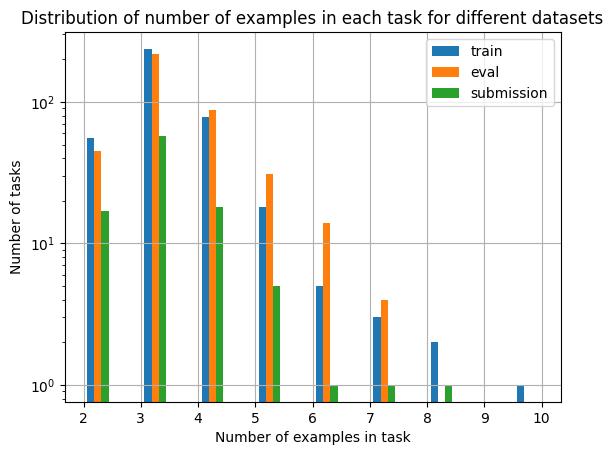

In [7]:
# Data
data1 = np.array([len(f_train[id_]["train"]) for id_ in train_ids])
data2 = np.array([len(f_eval[id_]["train"]) for id_ in list(f_eval)])
data3 = np.array([len(f_submission[id_]["train"]) for id_ in list(f_submission)])

# Define common bin edges
bin_width = 0.5
min_bin = min(data1.min(), data2.min(), data3.min())
max_bin = max(data1.max(), data2.max(), data3.max())
bin_edges = np.arange(start=np.floor(min_bin), stop=np.ceil(max_bin) + bin_width, step=bin_width)

# Calculate positions for each series
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = bin_width / 4  # Width of each bar

# Plotting each histogram
plt.bar(bin_centers - width, np.histogram(data1, bins=bin_edges)[0], width=width, label="train")
plt.bar(bin_centers, np.histogram(data2, bins=bin_edges)[0], width=width, label="eval")
plt.bar(bin_centers + width, np.histogram(data3, bins=bin_edges)[0], width=width, label="submission")

# Adding labels and titles
plt.xlabel("Number of examples in task")
plt.ylabel("Number of tasks")
plt.title("Distribution of number of examples in each task for different datasets")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()